In [1]:
from flax import nnx
import jax
import jax.numpy as np
import optax
import matplotlib.pyplot as plt
from tqdm import tqdm
from nn import MLP
plt.style.use('tufte.mplstyle')

In [2]:
@nnx.jit
def train_step(model, optimizer, x, y):
    def loss_fn(model):
        y_pred = model(x)
        return np.mean((y_pred - y)**2)

    loss, grads = nnx.value_and_grad(loss_fn)(model)
    optimizer.update(grads)  # In place updates.
    return loss

In [3]:
x = np.linspace(0, 2*np.pi)
y = np.sin(x)
x = x.reshape((-1,1))
print(x.shape)
    
model = MLP([1,50,50,1], rngs=nnx.Rngs(0), dtype=x.dtype, kernel_init=nnx.initializers.glorot_normal())
optimizer = nnx.Optimizer(model, optax.adam(1e-3))  # reference sharing

pbar = tqdm(range(10_000))
for i in pbar:
    loss = train_step(model, optimizer, x, y)
    pbar.set_postfix(loss=loss, refresh=False)

(50, 1)


100%|████████████████| 10000/10000 [00:02<00:00, 3677.31it/s, loss=5.494177e-07]


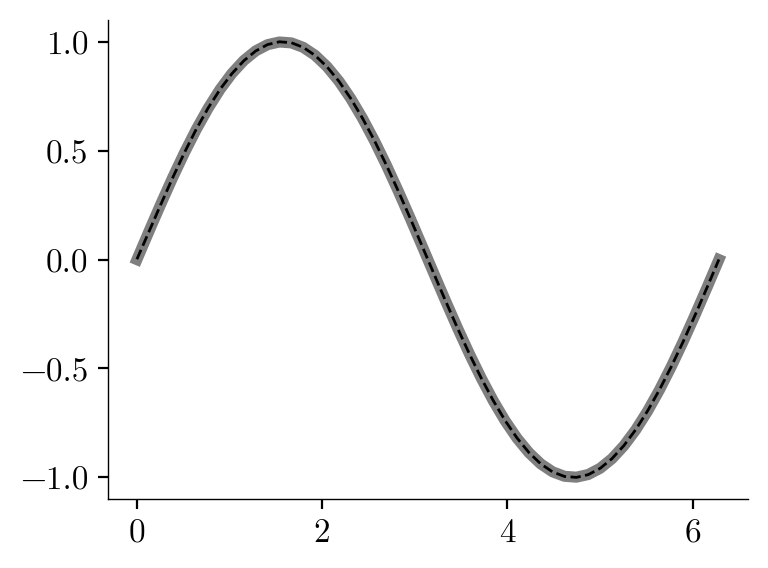

In [4]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), color='C0', lw=4, alpha=0.5)
ax.plot(x, model(x), color='C0', ls='--')
plt.show()